In [51]:
import keras
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import keras.saving
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot as plt


In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

In [21]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [23]:

num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(0.0001)

(32, 32, 3)


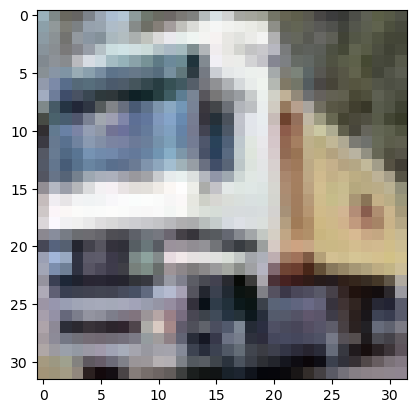

In [25]:

plt.imshow(x_train[1])
print(x_train[1].shape)

In [39]:

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='softmax'))


In [29]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [31]:
# check model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 1, 512)      │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,344 (57.13 MB)

 Trainable params: 14,977,344 (57.13 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# train
model.fit(x=x_train,y=y_train.squeeze(), validation_data=(x_test, y_test.squeeze()),batch_size=128,epochs=10,callbacks=[reduce_lr])

C:\Users\ganap_ywk0b0g\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1116s 3s/step - accuracy: 0.2234 - loss: 2.3145 - val_accuracy: 0.4830 - val_loss: 1.4519 - learning_rate: 1.0000e-04
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1115s 3s/step - accuracy: 0.5460 - loss: 1.2717 - val_accuracy: 0.6201 - val_loss: 1.0812 - learning_rate: 1.0000e-04
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1108s 3s/step - accuracy: 0.6497 - loss: 0.9895 - val_accuracy: 0.6472 - val_loss: 1.0219 - learning_rate: 1.0000e-04
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1058s 3s/step - accuracy: 0.7173 - loss: 0.8061 - val_accuracy: 0.7164 - val_loss: 0.8269 - learning_rate: 1.0000e-04
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1348s 3s/step - accuracy: 0.7765 - loss: 0.6427 - val_accuracy: 0.7453 - val_loss: 0.7523 - learning_rate: 1.0000e-04
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1515s 4s/step - accuracy: 0.8225 - loss: 0.5099 - val_accuracy: 0.7519 - val_loss: 0.7398 - learning_rate: 1.0000e-04
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1454s 4s/ste

In [37]:

print(model.metrics_names)
model.evaluate(x=x_test,y=y_test,batch_size=512)

['loss', 'compile_metrics']
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.7874 - loss: 1.0132


[1.036826252937317, 0.7835000157356262]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
predict class: 499
expected class: 5


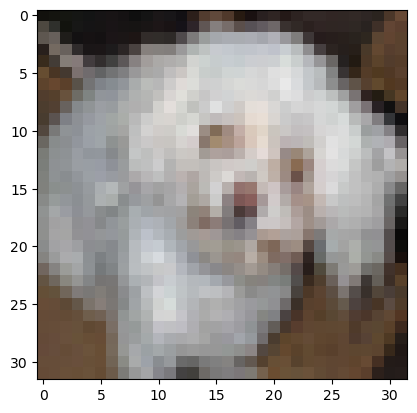

In [41]:

plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [55]:
model.save("keras-VGG16-cifar10.keras")